In [25]:
import tensorflow as tf
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [4]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
X_train.shape

(55000, 28, 28)

In [7]:
# Flatten the images for PCA
X_train_flat = X_train.reshape(-1, 28 * 28)
X_valid_flat = X_valid.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

In [14]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_flat)


In [15]:
X_valid_pca = pca.transform(X_valid_flat)
X_test_pca = pca.transform(X_test_flat)

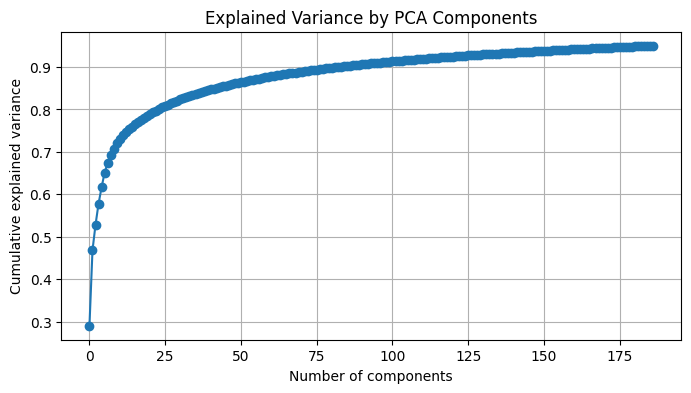

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [17]:
print("Original shape:", X_train.shape)
print("Transformed shape:", X_train_pca.shape)

Original shape: (55000, 28, 28)
Transformed shape: (55000, 187)


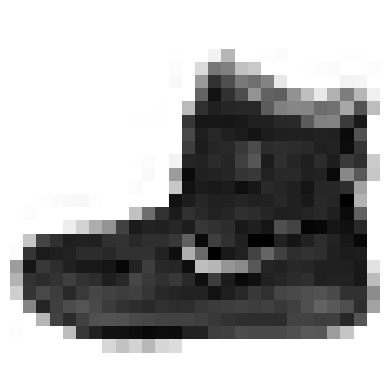

In [18]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[187]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 187)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,510 (341.84 KB)

 Trainable params: 87,510 (341.84 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
history = model.fit(X_train_pca, y_train, epochs=30, validation_data=(X_valid_pca, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6779 - loss: 1.0052 - val_accuracy: 0.8160 - val_loss: 0.5005
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8315 - loss: 0.4776 - val_accuracy: 0.8370 - val_loss: 0.4354
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8523 - loss: 0.4175 - val_accuracy: 0.8524 - val_loss: 0.4044
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8641 - loss: 0.3863 - val_accuracy: 0.8614 - val_loss: 0.3854
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8703 - loss: 0.3653 - val_accuracy: 0.8652 - val_loss: 0.3723
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8758 - loss: 0.3494 - val_accuracy: 0.8674 - val_loss: 0.3625
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8794 - loss: 0.3365 - val_accuracy: 0.8704 - val_loss: 0.3545
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8830 - loss: 0.3255 - 

In [36]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[187]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train_pca, y_train, epochs=30, validation_data=(X_valid_pca, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 110s 63ms/step - accuracy: 0.6642 - loss: 1.0872 - val_accuracy: 0.8432 - val_loss: 0.4300
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8569 - loss: 0.4127 - val_accuracy: 0.8642 - val_loss: 0.3781
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8731 - loss: 0.3615 - val_accuracy: 0.8722 - val_loss: 0.3563
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8821 - loss: 0.3329 - val_accuracy: 0.8748 - val_loss: 0.3429
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8897 - loss: 0.3119 - val_accuracy: 0.8780 - val_loss: 0.3333
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8961 - loss: 0.2948 - val_accuracy: 0.8812 - val_loss: 0.3259
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9017 - loss: 0.2800 - val_accuracy: 0.8814 - val_loss: 0.3201
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9061 - loss: 0.266

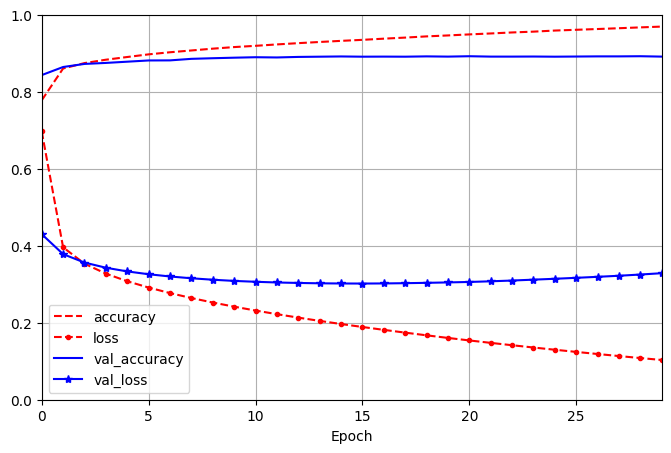

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5),
                                   xlim=[0, 29], ylim=[0, 1],
                                   grid=True, xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [45]:
model.evaluate(X_test_pca, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8923 - loss: 0.3483


[0.34373629093170166, 0.8916000127792358]

In [46]:
y_pred = model.predict(X_test_pca)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
y_pred = np.argmax(y_pred, axis=1)

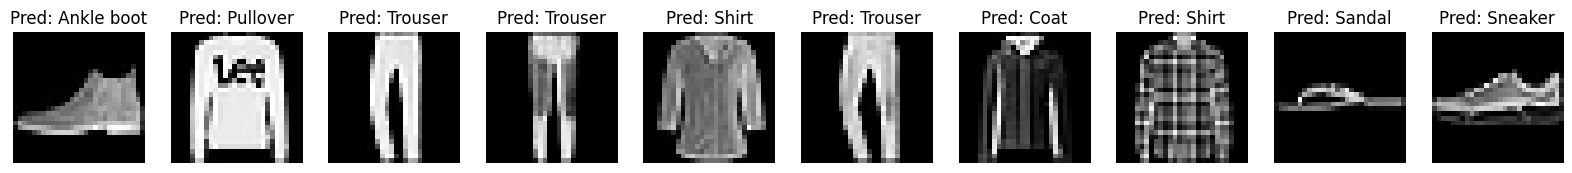

In [54]:
num_images = 10
plt.figure(figsize=(20, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')  # Assuming images are 28x28 pixels
    plt.title(f"Pred: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.show()